<a href="https://colab.research.google.com/github/Milani0528/webApp_Loan/blob/main/CatBoost_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q lightgbm xgboost catboost imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier



In [3]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [18]:
train_test_split =pd.read_csv("/content/drive/MyDrive/Milani vichara/train.csv")
test_test_split=pd.read_csv("/content/drive/MyDrive/Milani vichara/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/Milani vichara/sample_submission.csv")

In [5]:
train_test_split.head()

,id,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,loan_defaulted
0,8949,708472008,44,F,3,Uneducated,Married,Less than $40K,Blue,36,...,3,6680.0,1839,4841.0,0.617,7632,95,0.532,0.275,0
1,6666,713927283,39,F,1,Graduate,Single,Unknown,Blue,34,...,1,2884.0,2517,367.0,0.693,4809,87,0.740,0.873,0
2,7120,715593783,52,M,1,Unknown,Married,$80K - $120K,Blue,36,...,2,14858.0,1594,13264.0,0.510,4286,72,0.636,0.107,0
3,2258,713237958,34,M,0,Graduate,Married,$40K - $60K,Blue,17,...,4,2638.0,2092,546.0,0.591,1868,43,0.344,0.793,0
4,3462,717569283,47,M,5,Doctorate,Single,Less than $40K,Blue,36,...,2,8896.0,1338,7558.0,0.741,4252,70,0.591,0.150,0


In [6]:
test_test_split.head()

,id,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,9886,778873608,44,M,4,Uneducated,Married,$80K - $120K,Silver,25,...,1,1,34516.0,1984,32532.0,0.734,14335,116,0.758,0.057
1,5154,714407058,40,M,3,Uneducated,Divorced,$80K - $120K,Blue,29,...,2,1,30997.0,2330,28667.0,0.650,3821,81,0.841,0.075
2,1825,714753258,34,M,2,Unknown,Married,$60K - $80K,Blue,36,...,2,4,2379.0,1982,397.0,1.194,2966,50,1.381,0.833
3,4350,711850533,46,F,4,Uneducated,Single,Unknown,Blue,36,...,1,4,3818.0,0,3818.0,0.885,4272,71,0.578,0.000
4,3690,784560258,45,M,1,Uneducated,Divorced,$60K - $80K,Blue,39,...,2,0,21721.0,1247,20474.0,0.657,3937,63,0.658,0.057


In [7]:
sample_submission.head()

,id,loan_defaulted
0,9886,0
1,5154,0
2,1825,0
3,4350,0
4,3690,0


In [8]:
print(train_test_split.columns.tolist())

['id', 'CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'loan_defaulted']


In [9]:
X = train_test_split.drop(columns=["id", "CLIENTNUM", "loan_defaulted"])
y = train_test_split["loan_defaulted"]

# Prepare test set (optional, depending on your use case)
X_test = test_test_split.drop(columns=["id", "CLIENTNUM"], errors="ignore")


In [10]:
label_encoders = {}
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    X_test[col] = le.transform(X_test[col])  # Ensure X_test exists now
    label_encoders[col] = le

In [11]:
joblib.dump(label_encoders, "label_encoders.pkl")

from google.colab import files
files.download("label_encoders.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)


In [20]:
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)


In [23]:
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)


In [27]:
import joblib

# Save model
joblib.dump(CatBoostClassifier, "catboost_churn_model.pkl")

['catboost_churn_model.pkl']

In [24]:
files.download("catboost_churn_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
val_preds = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))

Accuracy: 0.9873949579831933
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1190
           1       0.98      0.99      0.99      1190

    accuracy                           0.99      2380
   macro avg       0.99      0.99      0.99      2380
weighted avg       0.99      0.99      0.99      2380



In [29]:
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
preds = catboost_model.predict(X_val)

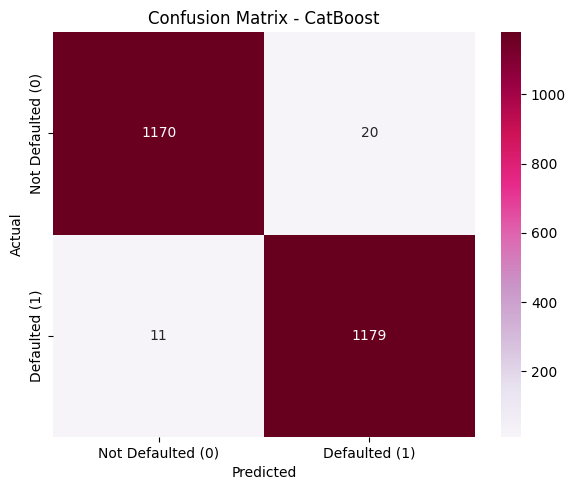

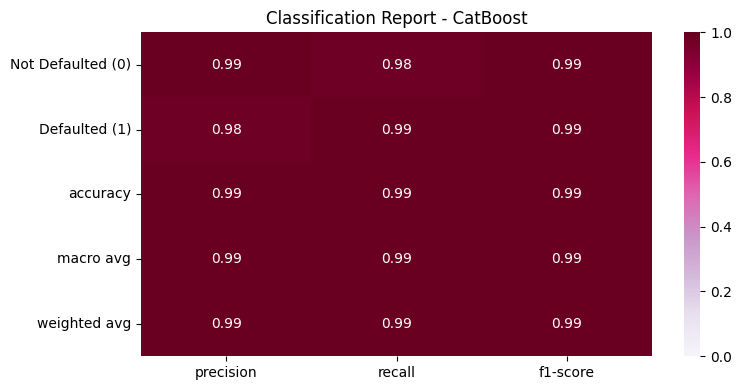

In [30]:
model = CatBoostClassifier(verbose=0)  # silent training
model.fit(X_train, y_train)

# 2. Predict
y_pred = model.predict(X_val)

# 3. Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd',
            xticklabels=['Not Defaulted (0)', 'Defaulted (1)'],
            yticklabels=['Not Defaulted (0)', 'Defaulted (1)'])
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 4. Classification Report
report = classification_report(y_val, y_pred, output_dict=True, target_names=['Not Defaulted (0)', 'Defaulted (1)'])
report_df = pd.DataFrame(report).T

# Keep only precision, recall, f1-score
report_df = report_df[['precision', 'recall', 'f1-score']].round(2)

# 5. Heatmap for Classification Report
plt.figure(figsize=(8, 4))
sns.heatmap(report_df, annot=True, cmap='PuRd', vmin=0.0, vmax=1.0, fmt='.2f')
plt.title("Classification Report - CatBoost")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [31]:
print(X.columns.tolist())

['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [32]:
feature_list = X.columns.tolist()

joblib.dump(feature_list, 'feature_list.pkl')

from google.colab import files
files.download("feature_list.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
joblib.dump(catboost_model, 'catboost_churn_model.pkl')

['catboost_churn_model.pkl']

In [37]:
catboost_model = joblib.load('catboost_churn_model.pkl')

In [42]:
test_preds = catboost_model.predict(X_test)
submission_catboost = pd.DataFrame({
    "id": test_test_split["id"],
    "loan_defaulted": test_preds
})
submission_catboost.to_csv("submission_catboost.csv", index=False)
print("✅ submission_catboost.csv saved.")

✅ submission_catboost.csv saved.


In [ ]:
joblib.dump(catboost_model, 'catboost_churn_model.pkl')

# Download it
from google.colab import files
files.download("catboost_churn_model.pkl")

In [68]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=80)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

In [69]:
print("Random Forest Accuracy:", accuracy_score(y_val, rf_preds))
print(classification_report(y_val, rf_preds))

Random Forest Accuracy: 0.9819327731092437
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1190
           1       0.97      0.99      0.98      1190

    accuracy                           0.98      2380
   macro avg       0.98      0.98      0.98      2380
weighted avg       0.98      0.98      0.98      2380



Accuracy: 0.9789915966386554


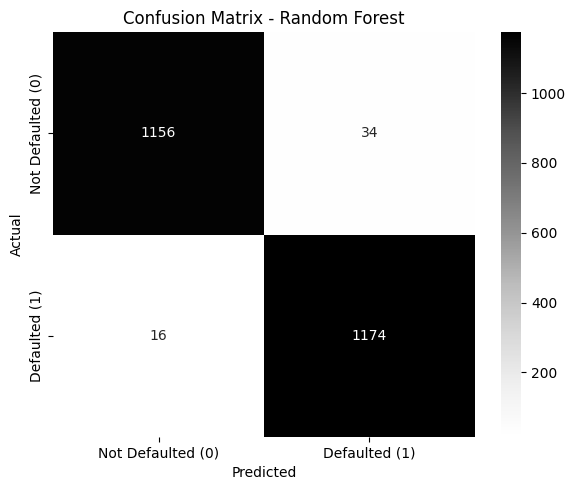

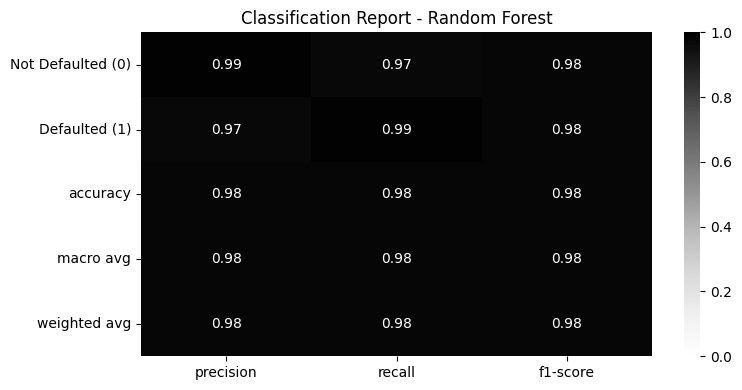

In [28]:
# 1. Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict on validation data
y_pred = rf_model.predict(X_val)

# 3. Accuracy
print("Accuracy:", accuracy_score(y_val, y_pred))

# 4. Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
            xticklabels=['Not Defaulted (0)', 'Defaulted (1)'],
            yticklabels=['Not Defaulted (0)', 'Defaulted (1)'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 5. Classification Report
report = classification_report(y_val, y_pred, output_dict=True, target_names=['Not Defaulted (0)', 'Defaulted (1)'])
report_df = pd.DataFrame(report).T

# Keep only precision, recall, f1-score
report_df = report_df[['precision', 'recall', 'f1-score']].round(2)

# 6. Classification Report Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df, annot=True, cmap='Greys', vmin=0.0, vmax=1.0, fmt='.2f')
plt.title("Classification Report - Random Forest")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
files.download('catboost_churn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=40)

In [64]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
preds = model.predict(X_val)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print("LogisticRegression Accuracy:", accuracy_score(y_val, preds))
print(classification_report(y_val, preds))


LogisticRegression Accuracy: 0.8407563025210084
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1190
           1       0.85      0.83      0.84      1190

    accuracy                           0.84      2380
   macro avg       0.84      0.84      0.84      2380
weighted avg       0.84      0.84      0.84      2380



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8407563025210084


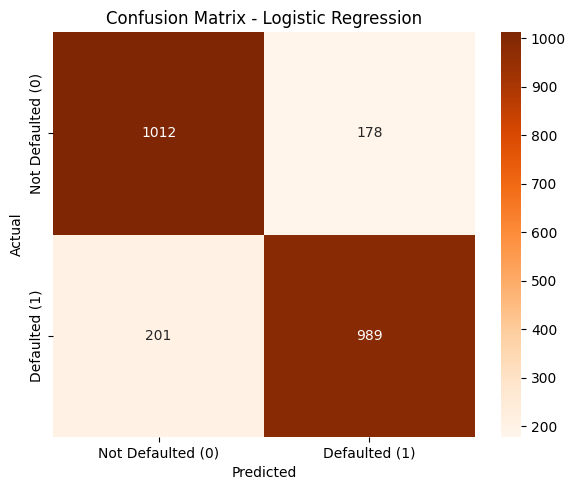

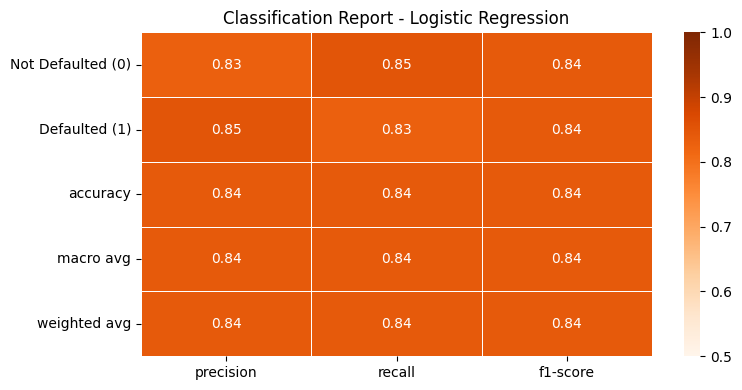

In [72]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# 2. Predict
log_preds = log_reg.predict(X_val)

# 3. Accuracy Score
print("Accuracy:", accuracy_score(y_val, log_preds))

# 4. Confusion Matrix Heatmap
cm = confusion_matrix(y_val, log_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Defaulted (0)', 'Defaulted (1)'],
            yticklabels=['Not Defaulted (0)', 'Defaulted (1)'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 5. Classification Report Heatmap
report = classification_report(y_val, log_preds, output_dict=True,
                                target_names=['Not Defaulted (0)', 'Defaulted (1)'])

report_df = pd.DataFrame(report).T
report_df = report_df[['precision', 'recall', 'f1-score']].round(2)

plt.figure(figsize=(8, 4))
sns.heatmap(report_df, annot=True, cmap='Oranges', fmt='.2f',
            vmin=0.5, vmax=1.0, linewidths=0.5, linecolor='white')
plt.title("Classification Report - Logistic Regression")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [69]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))
val_preds = (model.predict(X_val) > 0.5).astype(int)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5485 - loss: 458.2039 - val_accuracy: 0.6929 - val_loss: 82.9946
Epoch 2/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6065 - loss: 186.9895 - val_accuracy: 0.6983 - val_loss: 39.2654
Epoch 3/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6524 - loss: 66.9066 - val_accuracy: 0.7387 - val_loss: 15.0865
Epoch 4/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6687 - loss: 21.5278 - val_accuracy: 0.7029 - val_loss: 4.4290
Epoch 5/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6525 - loss: 4.4933 - val_accuracy: 0.7403 - val_loss: 1.1202
Epoch 6/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6308 - loss: 1.5438 - val_accuracy: 0.6223 - val_loss: 0.8579
Epoch 7/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6502 - loss: 1.0057 - val_accuracy: 0.6874 - val_loss: 0.7194
Epoch 8/20
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6598 - loss: 0.7596 - val_acc

In [71]:
model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [72]:
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))

Validation Accuracy: 0.9873949579831933
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1190
           1       0.98      0.99      0.99      1190

    accuracy                           0.99      2380
   macro avg       0.99      0.99      0.99      2380
weighted avg       0.99      0.99      0.99      2380



In [25]:
model = GaussianNB()
model.fit(X_train, y_train)

val_preds = model.predict(X_val)

In [24]:
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))

Validation Accuracy: 0.9873949579831933
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1190
           1       0.98      0.99      0.99      1190

    accuracy                           0.99      2380
   macro avg       0.99      0.99      0.99      2380
weighted avg       0.99      0.99      0.99      2380



In [49]:
# 1. Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X_train, y_train)

# 2. Predict on validation set
dt_preds = dt_model.predict(X_val)

In [50]:
print("Decision Tree Accuracy:", accuracy_score(y_val, dt_preds))
print(classification_report(y_val, dt_preds))

Decision Tree Accuracy: 0.9495798319327731
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1190
           1       0.94      0.96      0.95      1190

    accuracy                           0.95      2380
   macro avg       0.95      0.95      0.95      2380
weighted avg       0.95      0.95      0.95      2380



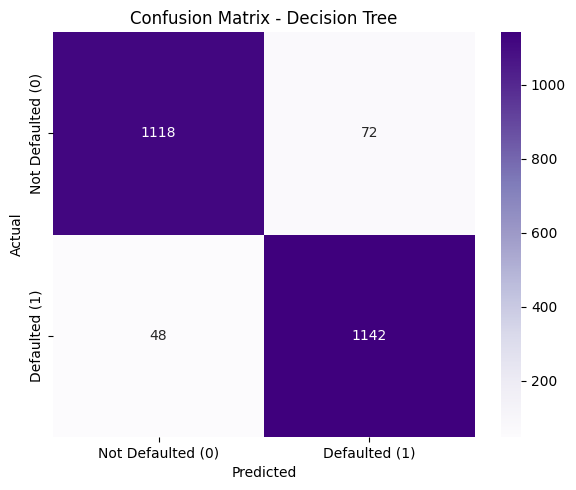

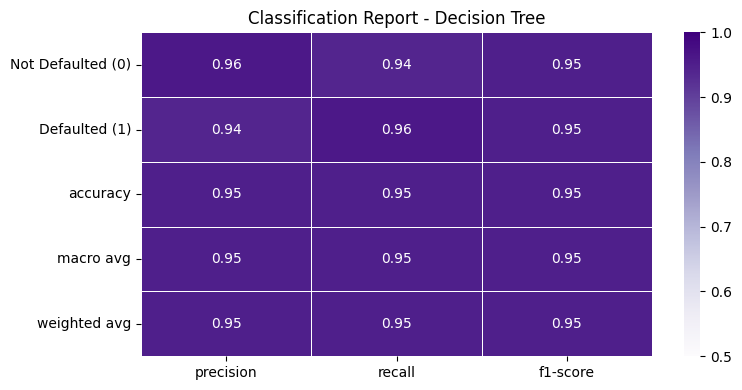

In [51]:
cm = confusion_matrix(y_val, dt_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Defaulted (0)', 'Defaulted (1)'],
            yticklabels=['Not Defaulted (0)', 'Defaulted (1)'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 5. Classification Report Heatmap
report = classification_report(y_val, dt_preds, output_dict=True,
                                target_names=['Not Defaulted (0)', 'Defaulted (1)'])
report_df = pd.DataFrame(report).T
report_df = report_df[['precision', 'recall', 'f1-score']].round(2)

plt.figure(figsize=(8, 4))
sns.heatmap(report_df, annot=True, cmap='Purples', fmt='.2f',
            vmin=0.5, vmax=1.0, linewidths=0.5, linecolor='white')
plt.title("Classification Report - Decision Tree")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

val_preds = model.predict(X_val)
print("KNN Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))

KNN Accuracy: 0.9029411764705882
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1190
           1       0.87      0.94      0.91      1190

    accuracy                           0.90      2380
   macro avg       0.91      0.90      0.90      2380
weighted avg       0.91      0.90      0.90      2380



In [ ]:
test_pred = model.predict(X_test)
submission = pd.DataFrame({
    "id": test_test_split["id"],
    "loan_defaulted": test_pred
})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv saved.")

✅ submission.csv saved.
